# 🏂 Holt Winters Model (Seasonal Version)
Now, it has the WINTER component, meaning *the season of winter will be covered* 😁 <br>
**Nah**, here winters is not the ***season***!

### 🤷‍♂️ But why Winters?
Now obviously you will get this doubt that *there can be a name like **holt** but, what about **winter** part? Does that show some kind of seasonality*? Hah, looking on the internet:

> Holt-Winter's Exponential Smoothing as named after its **two contributors**: Charles ***Holt*** and Peter ***Winter*** is one of the oldest time series analysis techniques which takes into account the trend and seasonality while doing the forecasting.

અરે યાર, winter કોઈનો નામ પણ હોય! 🙄

____

We started our journey of forecasting with:
- Simple MA
- Exponentially MA

Till now **no** forecasting was done.
- Simple Exponential Smoothing (The EWMA but repeated the last term `h` times) | **No Season, No Trend**
- Holt model (Added the *trend* in the calculation) | **No Season, Yes Trend**

And, now you *might* feel the *real* forecasting. Because it is:
- Holt Winter's model | **Yes Season, Yes Trend**.

###### 

### ❄ The components, visually

We will plot the values with *our* data when we will get into that part, but for now - let's have a look at how 3 of the components look like when they are plotted.

<img src="../images/holt-winters-1.png" height=400 width=500>

- See, that season component has **only** extracted the fluctuations overtime
- The trend (slope) shows **when** was what kind of trend in time. Still, it is not much intuative
- The level is just the EWMA at that perticular time so, nothing much to tell about it

But, don't worry we will see this in action in out `passengers` dataset soon. First, let's get into the nitty gritty stuff of this model.

## 

### `2` Ways to Model The Problem
Meaning, there are **2** ways to put the **equation into an action**. Which equation? — The Main Forecast Equation $\hat y_{t + h | t} $.

1. Additive Method — Seasonal comp. is ***added***
    - y = level + trend + seasonal
2. Multiplicative Method — Seasonal comp. is ***multiplied***
    - y = (level + trend) * seasonal

Let's see how it works & how it affects the following equations.

##### 

## ➕ Additive Method

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = l_t + (b_t \times h) + s_{t + h - mk} $$

- Bro! The most of the equation is just the ***same*** as we have seen in the Holt's model!
- And the remaining is to be understood only! What an ease!
- Now, things are gonna get a **level forward**. Here, you will have to *look back in time for frequany `m` and for the latest time `k`.*

I know, I know things are looking foreign to you, but we will understand that a bit better*ly*. And for that we have a dedicated section for our $s_{t + h - mk}$ only. Let's ***de-mystify*** the seasonal term! We are coming winter! 😈

# $$ s_{t + h - mk} $$

- $t:$ It is the last known time of the real observation (hence we add $h$ to it to show the future time).

- $h:$ It is the steps to look forward in the future.


- $m:$ Defines the **period** of the seasonal component (you can say a cycle - frequency) which is: *a length of time for the signal to repeat itself*.
    - Thus, if we are looking at the sales data **each month** then the period will be... month? Nah! A year!
    - It is because the analysis goes on for a year (the overall) but they are based on the months.
    - Similarly, if I am looking at my BP data **each second** then the period will be... second? Come on! A day! Or Month!
    - See, the **pattern** or the season can only be seen when you **zoom out** in the time frame. So, it should be intuative.


- $k:$ It is a **number chosen** so that we can ***appropriately*** look back in the training data. To consider the **last** data to be considered.
    - I want to consider the last year's data for each month so... suppose today is **June - 22** and so for that I want my model to take the data from **June - 21** and hence I will take `k` as `1`.
    - But if I want the data 2 years back ie. consider **June - 20** so for that I would take `k` as `2`.
    - See that `k` is **multiplied** with the period term `m` which makes sense as we would get back `k` times on the units of defined as `m`.
    - If `m=12` & `k=1` → Go back 12 months (1 year back)
    - If `m=12` & `k=2` → Go back 24 months (2 years back)
    - If `m=24` & `k=3` → Go back 72 hours (3 days back)
    - **Obviously** the model doesn't know whether there are days, or hours ***it will just go back `mk` units back*** which could be months, days, hours etc.
    
    
- That's not it, mathameticians have given the ***formulae*** to get the value for `k`. Which is: $k = floor(\frac{h - 1}{m} + 1)$
    
> **NOTE**: That only the *level* and *trend* components are from the last known component and the *seasonal* component comes from the last period.

Huff... Amazing Amzing... Please read back **again** if you didn't get it. It is really easy.<br> Once again from my another book: માત્ર આ વાંચ, હાઉ દૂર થઇ જશે. Guerenteed 😉

##### 

#### 2️⃣ Level Equation
# $$l_t = \alpha (y_t - s_{t - m}) + (1 - \alpha)(l_{t - 1} + b_{t - 1})$$

- Just a single change is here... just a single not more.
- That is: *Subtracting the seasonal component from the real value $y_t$*
- Why is that?
    - Because $y_t$ is ahead of other components, so it is removing some kind of cascading effect from the $y_t$.
    - This is *my weak* assumption behind *why*. It is not sure, but let's keep it that way.

Where, <br>
$l_t:$ Is the level that we know of, again we will see how to initialize and use it. <br>
$b_t:$ Is the trend, which like level is stored in the list and we then have to make things work. <br>
$s_{t - m}:$ Is the seasonal term, ***but*** this time it won't be used as level and trends are being used. We will use it by the **period `m`**. So, there will be the list of all the seasonal components like level & trend *but* the usage might differ.

##### 

#### 3️⃣ Trend Equation
# $$b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$$

- This is the **same** equation that we have used in the previous holt's model
- To put it in the author's words:
> It's an EWMA of the trend, as measured by the difference in level.

##### 

#### 4️⃣ Seasonal Equation
# $$s_t = \gamma(y_t - l_{t-1} - b_{t - 1}) + (1 - \gamma)s_{t - m}$$

- Looks **strange**? Nah! This might be simpler then the both above! *(I know: exaggeration)*.
- You can see multiple *subtractions* in the first bracket $(y_t - l_{t-1} - b_{t - 1})$
    - That simply is to get the **current** season from the data
    - How to get that? From the equation: $\hat y_{t + h | t} = l_t + (b_t \times h) + s_{t + h - mk} $
    - For a moment, **let's remove** the signs of time: $y = l + (b \times h) + s $
    - So to get the seasonal part $s$ we would: $s = y - l - (b \times h) $
    - And... for only one time, `h` will be `1` — Hence: $s = y - l - b $   
- And that's what we have in the above equation!

> **NOTE**: That in the second part of this equation we are having $(1 - \gamma)s_{t-m}$ and see that the $s_{t-m}$ is from the ***previous*** period.

# 

## ❌ Multiplicative Method

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = (l_t + (b_t \times h)) \times s_{t + h - mk} $$

- Just replaced `+` with `x` and nothing much...

##### 

#### 2️⃣ Level Equation
# $$l_t = \alpha \frac{y_t}{s_{t - m}} + (1 - \alpha)(l_{t - 1} + b_{t - 1})$$

- That small change only... from $(y_t - s_{t - m})$ to → $\left(\frac{y_t}{s_{t - m}}\right)$
- Why? Because see it in as some kind of the *effect of the equation change*.
- We have changed the equation from additive to multiplicative, thus the seasonal term will go in the denominator part.

##### 

#### 3️⃣ Trend Equation
# $$b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$$

- Haash, it is the same...
- But why isn't it being affected?
- It ***is*** being affected, but as *it is based on the difference of the leveles* and the *levels themselves* are affected by the season in the 2️⃣ equation, there is **no need** to give the ***double effect*** here.
- At the EOD, we are just finding the slope.

##### 

#### 4️⃣ Seasonal Equation
# $$s_t = \gamma\left(\frac{y_t}{l_{t-1} - b_{t - 1}}\right) + (1 - \gamma)s_{t - m}$$

- The same thing, based on the equation.
- The the $s$ is multiplied, so the rest should be divided here!

##### 

### 🤨 Do `add` vs `multiply` make difference?

<img src="../images/additive_multiplicative.png" width=500 height=300>

This comparision shows... it does. In our example *(airline passengers)* we should use the *multiplicative* method as the amplitude of the number of the passengers get larger over the time and multiplication will give the better satisfaction to that condition.

But still we will **play around** with the data and see what is reality.

### 

### A Long Story?
I know it has been a long time we have been discussing the theory... so let's code!

### 

### 👨‍💻 The Code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

Getting confused? Why `ExponentialSmoothing`? <BR>
For that, let's revise what we have used till now.
    
```python
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # SES
from statsmodels.tsa.holtwinters import Holt                 # Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt-Winter
```

And, this is how it is.

In [3]:
df = pd.read_csv("../data/airline_passengers.csv", index_col=0, parse_dates=True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
df.index.freq = "MS"

In [20]:
# Simply storing the training and testing indices for later use
train_idx = df.index[:-12]
test_idx = df.index[-12:]

In [21]:
# Making the different sets so for convinience later
train = df.loc[train_idx]
test = df.loc[test_idx]

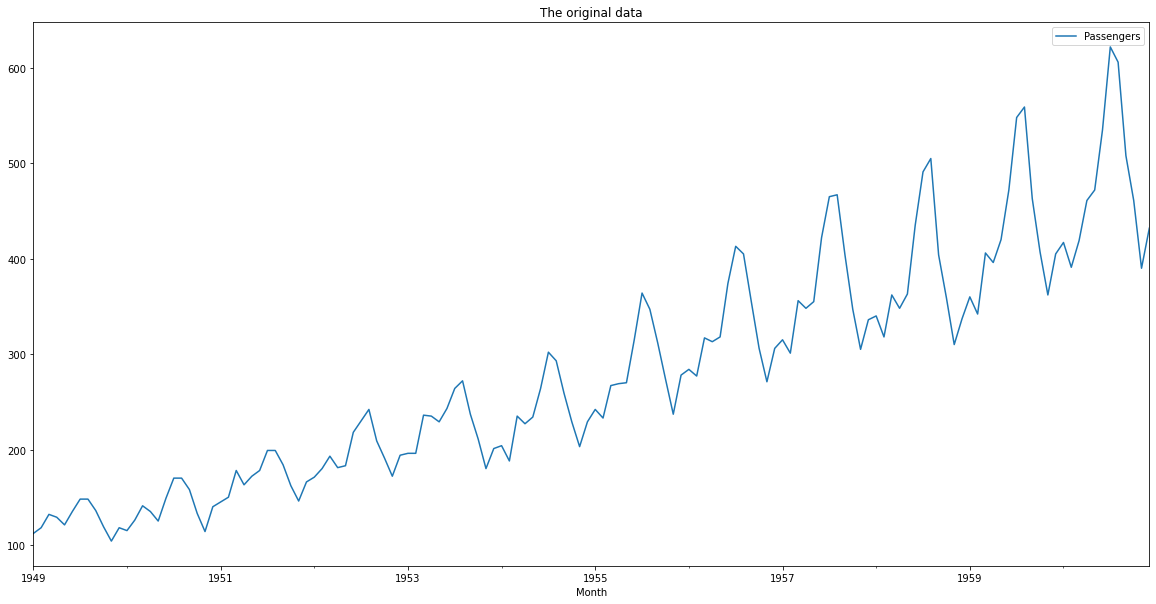

In [22]:
df.plot()
plt.title("The original data");

In [67]:
# See, we are `adding` the seasonal term
model = ExponentialSmoothing(train, 
                    trend="add", seasonal="add",
                    initialization_method="legacy-heuristic", seasonal_periods=12)
model

In [68]:
result = model.fit()

In [69]:
result.params

{'smoothing_level': 0.2511208117084883,
 'smoothing_trend': 1.3699489016031072e-08,
 'smoothing_seasonal': 0.7488791202590951,
 'damping_trend': nan,
 'initial_level': 217.94935028769095,
 'initial_trend': 2.5572900942746166,
 'initial_seasons': array([-108.39344441, -102.81693451,  -90.30023072,  -95.47695898,
        -104.21762072,  -90.14847472,  -77.97164947,  -80.41631954,
         -94.6046602 , -113.50692099, -128.15227238, -111.8351178 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [70]:
df.loc[train_idx, "HoltWinters"] = result.fittedvalues
df.loc[test_idx, "HoltWinters"] = result.forecast(12)

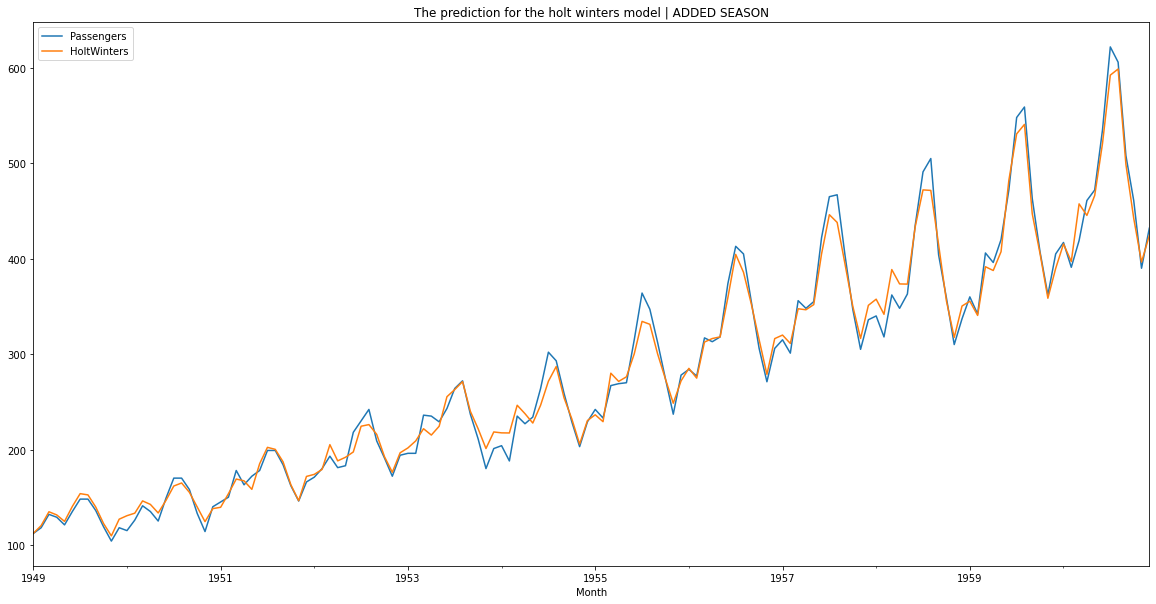

In [72]:
df.plot()
plt.title("The prediction for the holt winters model | ADDED SEASON");

Man! Now we are getting somewhere!!!!

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
print("Train Error: ", mean_squared_error(train, result.fittedvalues, squared=False))
print("Test Error: ", mean_squared_error(test, result.forecast(12), squared=False))

Train Error:  11.62469954262423
Test Error:  16.98114161550258


The test error, meaning the forecast error is a bit high...

In [75]:
print("Train R2: ", r2_score(train, result.fittedvalues))
print("Test R2: ", r2_score(test, result.forecast(12)))

Train R2:  0.9880231802938043
Test R2:  0.9479446490571849


###### 

### Coool

Let's now check, with the `multiplicative` method.

In [76]:
model = ExponentialSmoothing(train, 
                    trend="add", seasonal="mul",
                    initialization_method="legacy-heuristic",
                    seasonal_periods=12)

result = model.fit()
df.loc[train_idx, "HoltWinters"] = result.fittedvalues
df.loc[test_idx, "HoltWinters"] = result.forecast(12)

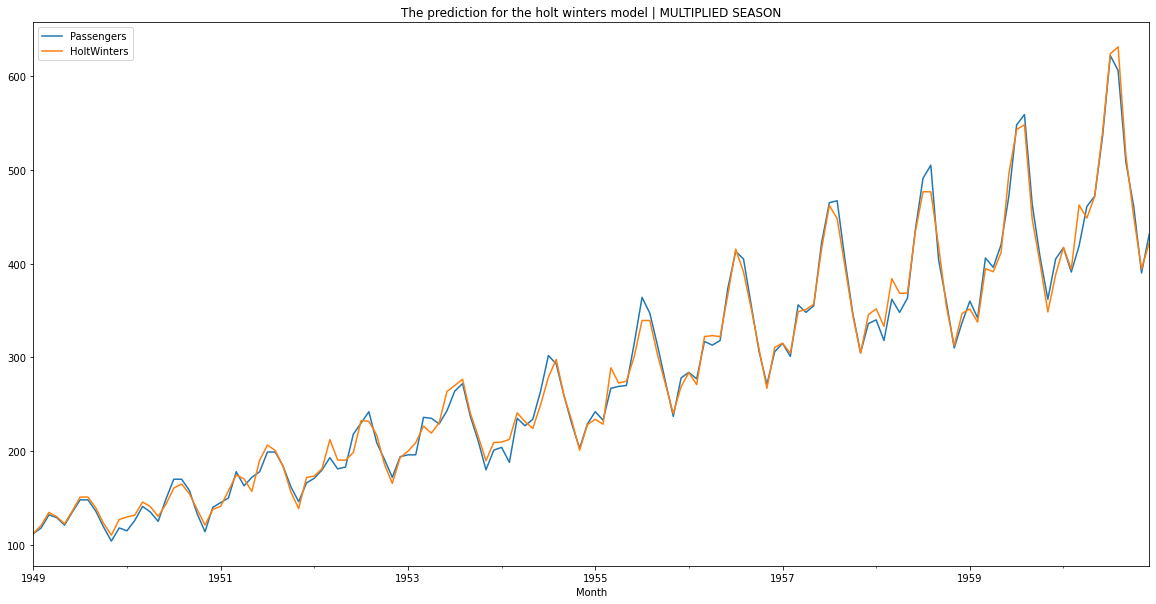

In [77]:
df.plot()
plt.title("The prediction for the holt winters model | MULTIPLIED SEASON");

In [78]:
print("Train Error: ", mean_squared_error(train, result.fittedvalues, squared=False))
print("Test Error: ", mean_squared_error(test, result.forecast(12), squared=False))

Train Error:  9.768020481856626
Test Error:  15.809890178532703


In [79]:
print("Train R2: ", r2_score(train, result.fittedvalues))
print("Test R2: ", r2_score(test, result.forecast(12)))

Train R2:  0.9915434901001925
Test R2:  0.9548778985740642


> Thing to note that, we are **no longer** lagging behind! Meaning, the predicted values are **not shifted** behind! 

# 

## 😋 Our Way!

In [81]:
# Initialization
alpha = 0.37620595760673303
beta = 3.1749652091346676e-06
gamma = 0.6237937324062822

lts = [train.iloc[1]] # the second value
bts = [train.iloc[1] - train.iloc[0]] # difference of second and first

In [215]:
print("Lts: ", lts)
print("Bts: ", bts)

Lts:  [118]
Bts:  [6]


In [216]:
train.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Freq: MS, Name: Passengers, dtype: int64

###### 

Now, let's formulate the equations...

- $l_t = \alpha y_t + (1 - \alpha)(l_{t - 1} + b_{t - 1})$

- $b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$

In [217]:
# forecasts is just the `linear regression` like equation 1️⃣
forecasts = [] 

# The first prediction (h=1 and then just the addition; remember?)
forecasts.append(lts[-1] + bts[-1]) 

In [218]:
forecasts

[124]

So, now we have our all 3 equations 1️⃣, 2️⃣, 3️⃣ initialized! **Let's shoot!**

In [219]:
# We will start the prediction from the 3rd day... okay? Hence [2:]:
for yt in train.iloc[2:]:
    lt = (alpha * yt) + ((1 - alpha) * (lts[-1] + bts[-1]))
    bt = (beta * (lt - lts[-1])) + ((1 - beta) * bts[-1])
    forecast = lt + bt # Still we are not predicting in the future! (h = 1)
    
    lts.append(lt)
    bts.append(bt)
    forecasts.append(forecast)

1. Check the difference between add and multiplicative
2. PLot the l, b, s